In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
recipe_df = pd.read_csv("recipe_site_traffic_2212.csv")

In [3]:
recipe_df.head(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
6,7,183.94,47.95,9.75,46.71,Chicken Breast,4,NaN
7,8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,NaN
8,9,538.52,3.78,3.37,3.79,Pork,6,High
9,10,248.28,48.54,3.99,113.85,Chicken,2,NaN


## Exploring missing data

In [4]:
# checking if the null values occur at the same points for the columns

num_missing_records = recipe_df[["calories", "sugar", "protein", "carbohydrate"]].isnull().all(axis=1).sum()

# Checking percentage of missing data
perc_missing = num_missing_records / len(recipe_df) * 100
print(perc_missing)

5.4910242872228086


There are 52 missing values in the columns for calories, carbohydrates, sugar, and protein. These null values occur at the same data points across the columns. Furthermore, the missing data comprises only 5.5% of the original data. Due to this low amount we can safely drop these missing values

## Dropping missing data

In [5]:
# retrieve the index of the missing values
missing_indices = recipe_df[recipe_df[["calories"]].isnull().any(axis=1)].index

# drop missing values
recipe_df2 = recipe_df.copy()

recipe_df2.drop(missing_indices, inplace=True)

In [6]:
recipe_df2.isnull().sum()

recipe            0
calories          0
carbohydrate      0
sugar             0
protein           0
category          0
servings          0
high_traffic    360
dtype: int64

In [7]:
recipe_df2["high_traffic"].unique()

array(['High', nan], dtype=object)

There are currently no more missing values in any column except the high_traffic column

The high_traffic column has only 2 unique values: 
- **"High"**:  Signifying high traffic when the recipe was shown
- **"nan"**: Likely signifying low traffic and NOT missing values. Hence we do not drop the nan values found in this column and instead apply a transformation to change these nan values to "Low"


We are left with 895 data entries to work with. The high_traffic column is tra

In [8]:
recipe_df2["high_traffic"] = recipe_df2["high_traffic"].apply(lambda x: "High" if x == "High" else "Low")

recipe_df2

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Low
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
...,...,...,...,...,...,...,...,...
941,942,186.21,83.94,1.98,22.40,Chicken Breast,4,High
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,Low
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


## Data Validation

All missing values in the data have been dropped and we are left with 895 rows and 8 columns as follows:

* recipe: Numeric, unique identifier of recipe. Data validated, no additional cleaning necessary
* calories: Numeric, number of calories. Data validated, no additional cleaning necessary
* carbohydrate: Numeric, amount of carbohydrates in grams. Data validated, no additional cleaning necessary
* sugar: Numeric, amount of sugar in grams. Data validated, no additional cleaning necessary
* protein: Numeric, amount of protein in grams. Data validated, no additional cleaning was necessary
* category: Character, type of recipe. Recipes are listed in one of ten possible groupings (Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal'). Additional cleaning was needed as a category "Chicken Breast" not present in the data specifications was found
* servings: Numeric, number of servings for the recipe. Additional cleaning was needed. The number values were stored as strings not integers. 
* high_traffic: Character, if the traffic to the site was high when this recipe was shown, this is marked with “High”. Column had 2 unique values "High" and Nan. "High" values were left as is and values denoted as Nan were converted to "Low" for better interpretation 


In [9]:
# validating numeric columns

def numeric_validation(col):

    # coerce to numeric in case of strings or bad data
    values = pd.to_numeric(recipe_df2[col], errors='coerce')

    # Check if any value is missing or it is a negative value
    if values.isna().any():
        print(f"{col} column has non-numeric or missing values")
    elif (values < 0).any():
        print(f"{col} column has negative values")
    else:
        print(f"{col} column is valid")

        
        
numeric_cols = ["calories", "carbohydrate", "sugar", "protein", "servings"]
        
for col in numeric_cols:
    numeric_validation(col)

calories column is valid
carbohydrate column is valid
sugar column is valid
protein column is valid
servings column has non-numeric or missing values


In [10]:
# On closer inspection the servings column has string values. We convert these values to the appropriate numeric values
print("unique values: ", recipe_df2["servings"].unique())



recipe_df2["servings"] = recipe_df2["servings"].apply(
    lambda x: 4 if x == "4 as a snack" else 6 if x == "6 as a snack" else x
)

recipe_df2["servings"] = recipe_df2["servings"].astype(int)


numeric_validation("servings")
print("unique values: ", recipe_df2["servings"].unique())


unique values:  ['4' '1' '2' '6' '4 as a snack' '6 as a snack']
servings column is valid
unique values:  [4 1 2 6]


In [11]:
# validating category column

valid_categories = ['Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal']

invalid_values = [value for value in recipe_df2["category"].unique() if value not in valid_categories]

if invalid_values:
    print(f"Invalid categories found: {invalid_values}")
else:
    print("All categories are valid.")

Invalid categories found: ['Chicken Breast']


In [12]:
# An invalid category of "Chicken Breast" was found. As this is a chicken based recipe we transform this category to "Chicken" instead
recipe_df2["category"] = recipe_df2["category"].apply(lambda x: "Chicken" if x == "Chicken Breast" else x)

print("Unique category values: ", recipe_df2["category"].unique())
print()

invalid_values = [value for value in recipe_df2["category"].unique() if value not in valid_categories]

if invalid_values:
    print(f"Invalid categories found: {invalid_values}")
else:
    print("All categories are valid.")

Unique category values:  ['Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken' 'Lunch/Snacks'
 'Pork' 'Vegetable' 'Meat' 'Dessert']

All categories are valid.


## Exploratory Data Analysis

Here the predictor and target variables were explored to determine if any relationships between them stood out

In [13]:
recipe_df2.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,473.652514,435.939196,35.069676,9.046547,24.149296,3.458101
std,272.763283,453.020997,43.949032,14.679176,36.369739,1.735979
min,2.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000
50%,475.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,708.500000,597.650000,44.965000,9.800000,30.200000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


### Distribution of numeric values (univariate analaysis)

From the histogram distributions we see that most distributions are right-skewed. This suggests most recipes are low to moderate in these values, with a few extreme outliers.


<AxesSubplot:xlabel='servings', ylabel='Count'>

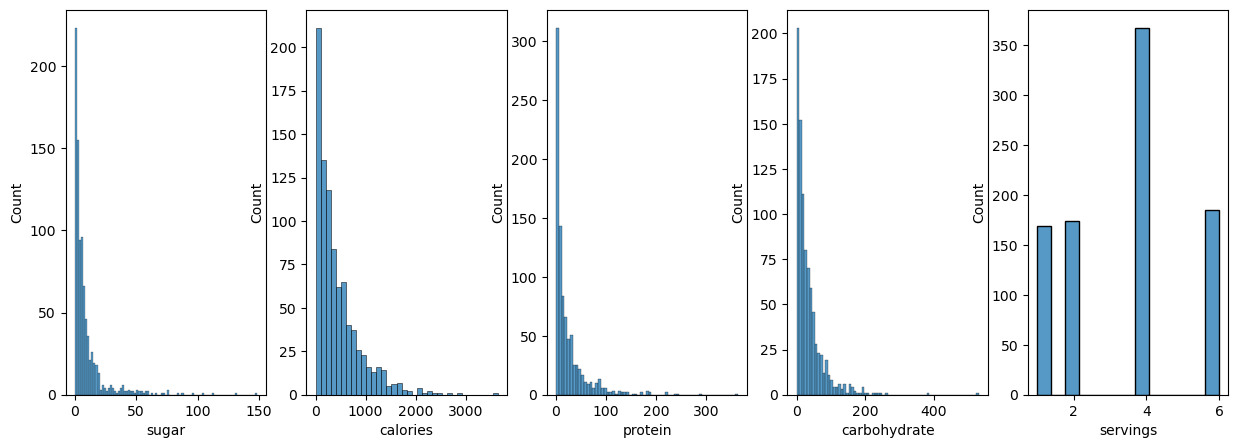

In [14]:
fig, axes = plt.subplots(1,5,figsize=(15,5))
sns.histplot(recipe_df2["sugar"], ax=axes[0])
sns.histplot(recipe_df2["calories"], ax=axes[1])
sns.histplot(recipe_df2["protein"], ax=axes[2])
sns.histplot(recipe_df2["carbohydrate"], ax=axes[3])
sns.histplot(recipe_df2["servings"], ax=axes[4])


### Distribution of Traffic Levels

The plot and results below. Show The target class is only slightly imbalanced which should be fine when making a classification model

In [15]:
recipe_df2["high_traffic"].value_counts(normalize=True)

High    0.597765
Low     0.402235
Name: high_traffic, dtype: float64

<AxesSubplot:xlabel='high_traffic', ylabel='count'>

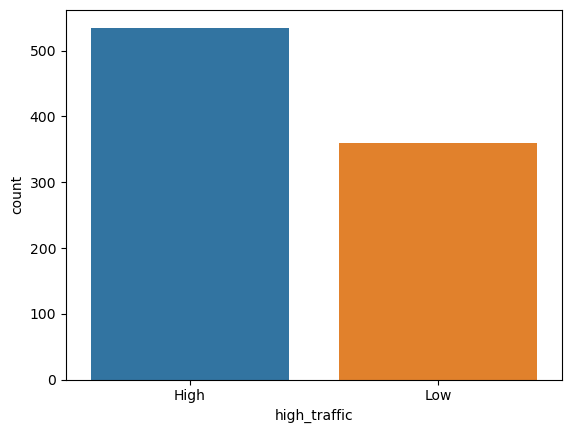

In [16]:
sns.countplot(x='high_traffic', data=recipe_df2)

### Distribution of numeric variables by level of traffic

[Text(0.5, 1.0, 'Distribution(servings by traffic level)')]

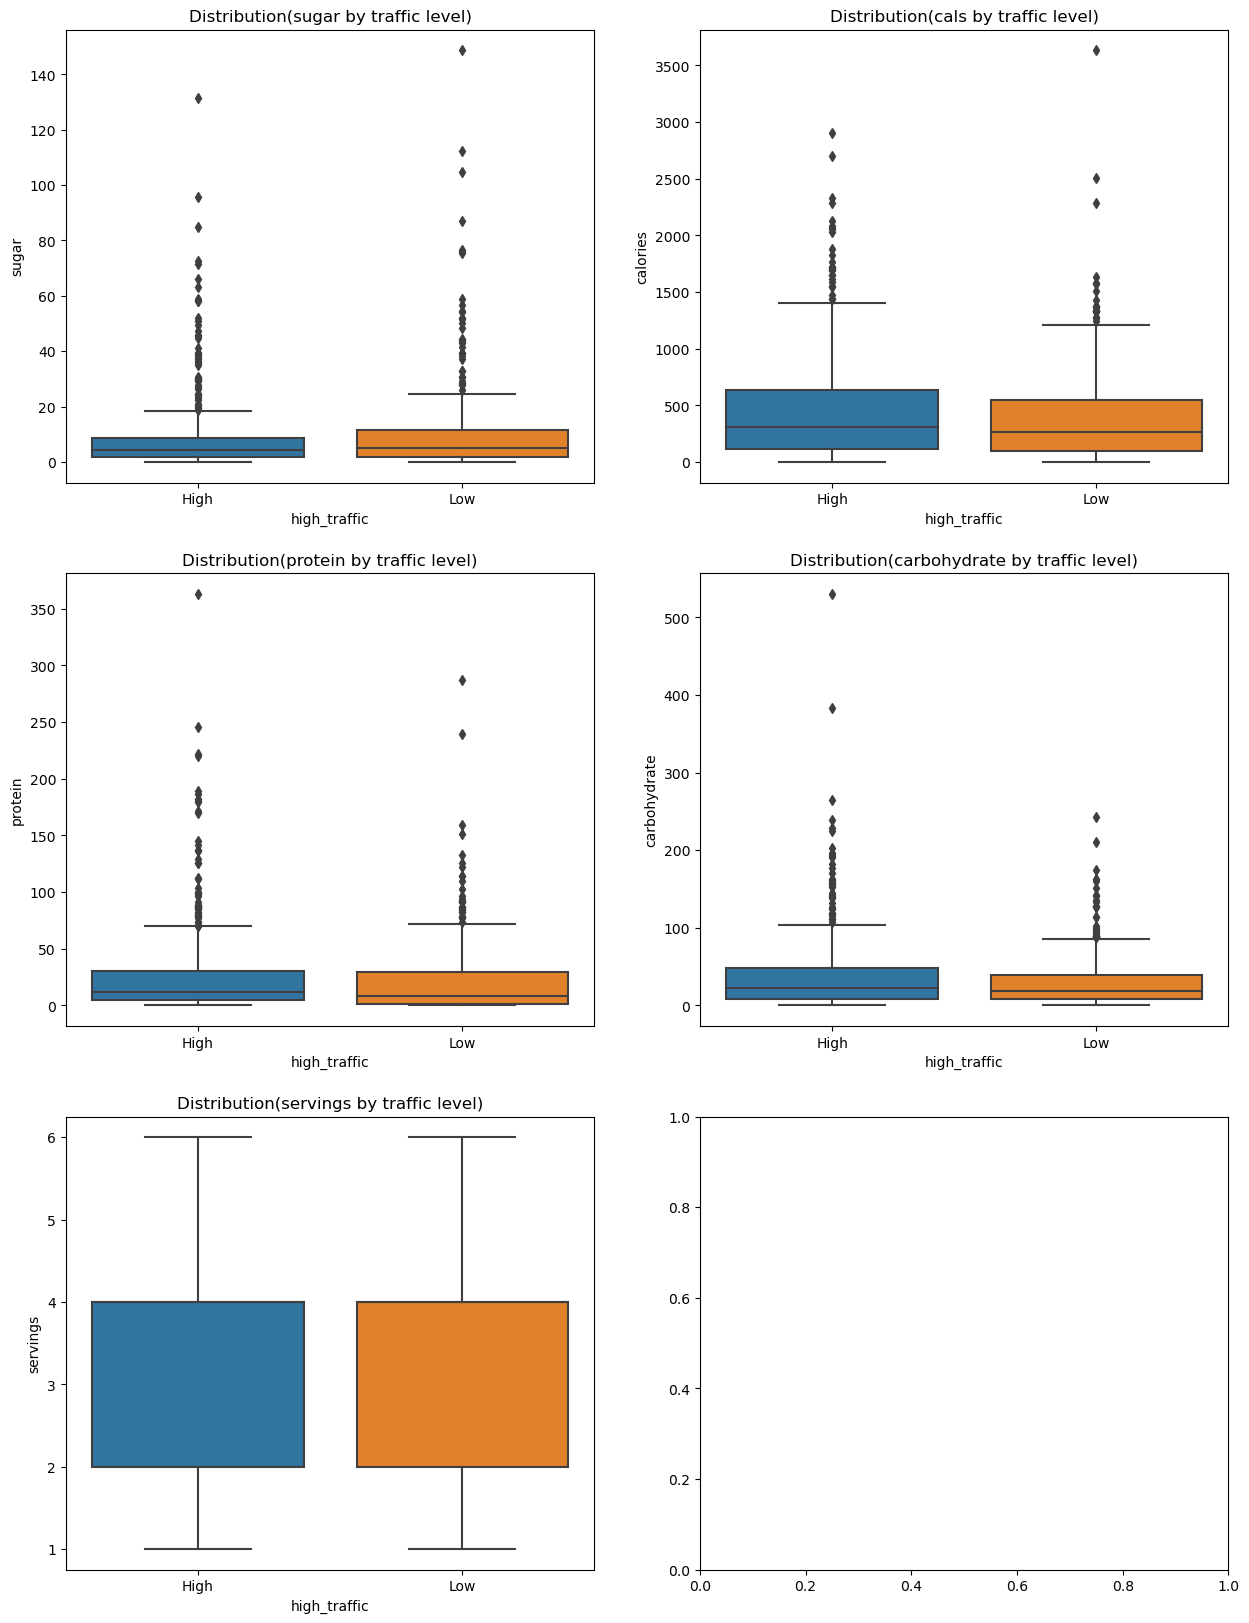

In [17]:
fig, axes = plt.subplots(3,2,figsize=(15,20))
sns.boxplot(x="high_traffic", y="sugar", data=recipe_df2, ax=axes[0, 0]).set(title="Distribution(sugar by traffic level)")
sns.boxplot(x="high_traffic", y="calories", data=recipe_df2, ax=axes[0, 1]).set(title="Distribution(cals by traffic level)")
sns.boxplot(x="high_traffic", y="protein", data=recipe_df2, ax=axes[1, 0]).set(title="Distribution(protein by traffic level)")
sns.boxplot(x="high_traffic", y="carbohydrate", data=recipe_df2, ax=axes[1, 1]).set(title="Distribution(carbohydrate by traffic level)")
sns.boxplot(x="high_traffic", y="servings", data=recipe_df2, ax=axes[2, 0]).set(title="Distribution(servings by traffic level)")


### Understanding relationship between numeric variables

Plots made to see if combinations between 2 variables e.g calories and carbohydrate affect traffic values. No significant relationship was found as the data points appear randomly in each plot

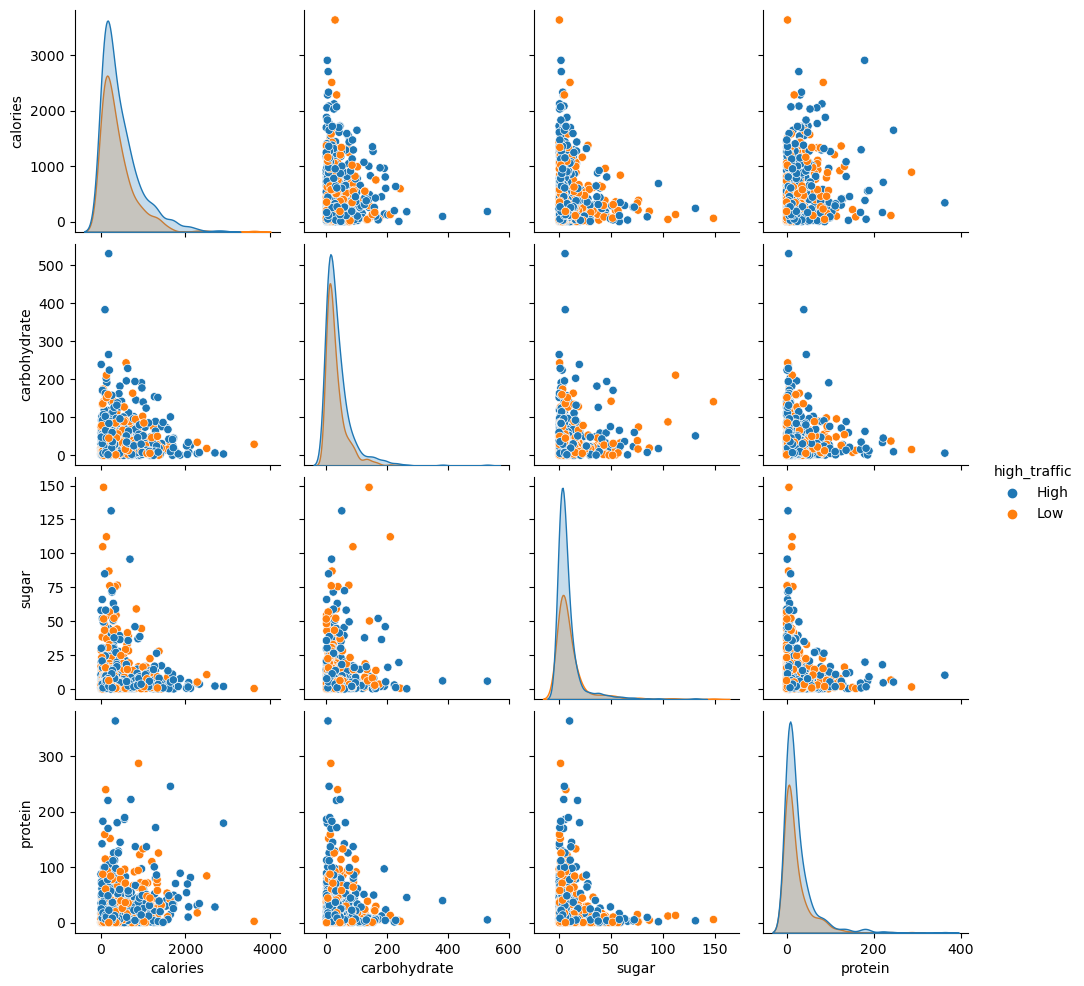

In [18]:
sns.pairplot(data=recipe_df2, vars=['calories', 'carbohydrate', 'sugar', 'protein'], hue='high_traffic')

### Correlation heat map

The absence of correlation hinted on from the above plot is confirmed by the heat map. The highest correlation value amongst all variables is a low number of 0.17

<AxesSubplot:>

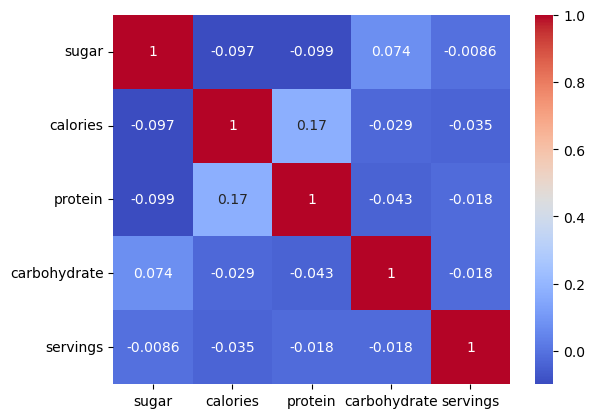

In [19]:
sns.heatmap(recipe_df2[["sugar", "calories", "protein", "carbohydrate", "servings"]].corr(), annot=True, cmap='coolwarm')


This plot is a grouped bar chart (countplot) that shows the distribution of recipes across different categories, split by their traffic level

The plot reveals recipe category is a strong predictor of popularity. It appears recipes including mainly either Potato, Vegetable, or Pork are associated with high user engagement.

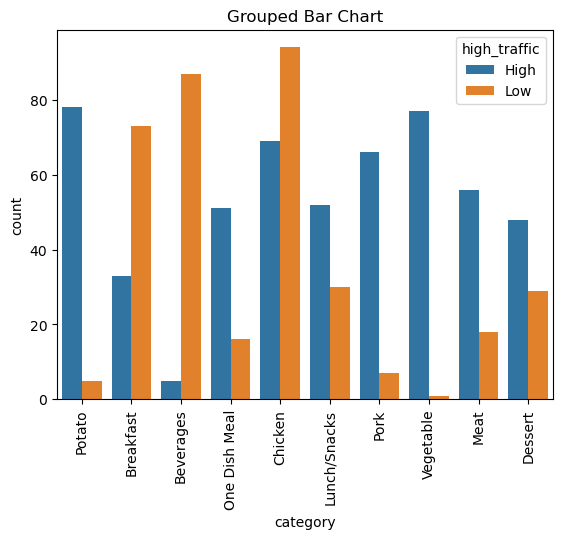

In [20]:
sns.countplot(data=recipe_df2, x='category', hue='high_traffic').set(title="Grouped Bar Chart")
plt.xticks(rotation=90)
plt.show()

## Fitting and Evaluating Model

The problem presented by the client demands using a binary classification model to determine high or low website traffic based on the given features. As per the business requirements, they would like to minimize the chance of showing unpopular recipes and predict popular recipes at least 80% of the time. This means that at least 80% of the recipes predicted to be popular by the model should actually generate high traffic. By optimizing for precision, we aim to reduce the chance of false positives and ensure that the recipes displayed are more likely to meet user engagement expectations. 

The base model used was the logistic regression model due to it's relatively straightforward syntax, setup and good generalizability 

For comparison, the decision tree model was used because of it's ability to handle more complex feature interactions


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [22]:
recipe_df2["high_traffic"] = recipe_df2["high_traffic"].apply(lambda x: 1 if x == "High" else 0)

### Preparing data for model

In [23]:
# Preprocessing data

X = recipe_df2.drop(columns=["recipe", "high_traffic"])

# getting dummy variables for the "category" column
X = pd.get_dummies(data=X, columns=["category"], drop_first=True)

y = recipe_df2["high_traffic"]


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=4)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)



## Logistic Regression Model

In [24]:
# model creation

logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

y_pred = logreg_model.predict(X_test_scaled)


# model evaluation
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7455357142857143
[[ 59  31]
 [ 26 108]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67        90
           1       0.78      0.81      0.79       134

    accuracy                           0.75       224
   macro avg       0.74      0.73      0.73       224
weighted avg       0.74      0.75      0.74       224



## Decision Tree Model

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
tree_model = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=5,       # limit depth to prevent overfitting
    class_weight='balanced',  
    random_state=4
)

tree_model.fit(X_train_scaled, y_train)

y_pred = tree_model.predict(X_test_scaled)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7410714285714286
[[ 62  28]
 [ 30 104]]
              precision    recall  f1-score   support

           0       0.67      0.69      0.68        90
           1       0.79      0.78      0.78       134

    accuracy                           0.74       224
   macro avg       0.73      0.73      0.73       224
weighted avg       0.74      0.74      0.74       224



The logistic regression and decision tree model were almost exactly similar in performance, returning very similar values for accuracy, recall and precision. 

The models currently predicts popular recipes with 78% precision and 81% recall. While precision is close to the target of 80%, there is still room for improvement. It still leaves a 20% false positive rate, meaning some unpopular recipes are being flagged as popular. On the other hand, the high recall (81%) shows that the model is identifying most of the actual popular recipes.

The model achieves a 75% accuracy, but we need to prioritize improving precision to meet the business goal. This will be done by tuning the hyper parameters. Although model results are relatively similar the focus will be shifted mainly on the logistic regression model as it more well rounded (a slightly higher f1 score in the positive class)

### Finding best logistic regression parameters to maximize precision

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = [
    {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # liblinear supports l1/l2
    'class_weight': ['balanced', None]
}
]


clf = GridSearchCV(logreg_model,param_grid = param_grid, cv = 5, verbose=True, scoring='precision')
best_clf = clf.fit(X_train_scaled,y_train)
print("best estimator", best_clf.best_estimator_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\Skipps\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Skipps\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Skipps\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\User

best estimator LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')


In [29]:
log_model2 = LogisticRegression(C=0.1, class_weight='balanced', penalty='l1', solver="liblinear")

log_model2.fit(X_train_scaled, y_train)
y_pred = log_model2.predict(X_test_scaled)

y_pred_train = log_model2.predict(X_train_scaled)

print("Training results")
print(classification_report(y_train, y_pred_train))



print("Testing results")
print(classification_report(y_test, y_pred))

Training results
              precision    recall  f1-score   support

           0       0.62      0.86      0.72       270
           1       0.87      0.64      0.74       401

    accuracy                           0.73       671
   macro avg       0.74      0.75      0.73       671
weighted avg       0.77      0.73      0.73       671

Testing results
              precision    recall  f1-score   support

           0       0.57      0.86      0.68        90
           1       0.85      0.56      0.68       134

    accuracy                           0.68       224
   macro avg       0.71      0.71      0.68       224
weighted avg       0.74      0.68      0.68       224



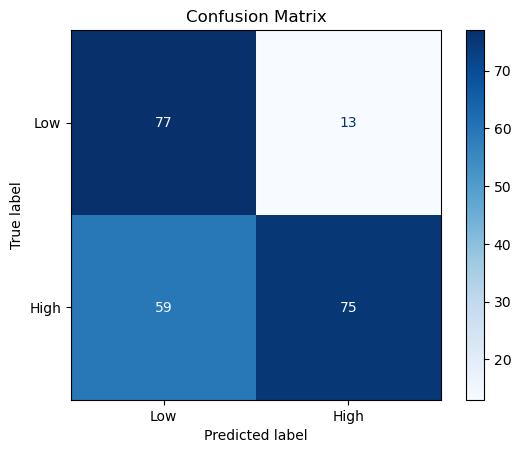

In [30]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

The updated model now shows an 85% precision for predicting popular recipes, which is an improvement over the previous 78%. This also illustrated in the confusion matrix above. However, this comes at the cost of recall now reduced to 56%. Nevertheless, for the business purposes this is still highly sufficient 

In [31]:
### Extrac

In [32]:

feature_names = X_train.columns
coefficients = log_model2.coef_[0]

# Create a DataFrame for easy viewing
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Sort by absolute coefficient value
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)
feature_importance

,Feature,Coefficient,Abs_Coefficient
13,category_Vegetable,0.908817,0.908817
12,category_Potato,0.741073,0.741073
11,category_Pork,0.680935,0.680935
10,category_One Dish Meal,0.419402,0.419402
9,category_Meat,0.379757,0.379757
8,category_Lunch/Snacks,0.235708,0.235708
7,category_Dessert,0.201358,0.201358
3,protein,0.096173,0.096173
0,calories,0.064744,0.064744
5,category_Breakfast,-0.034858,0.034858


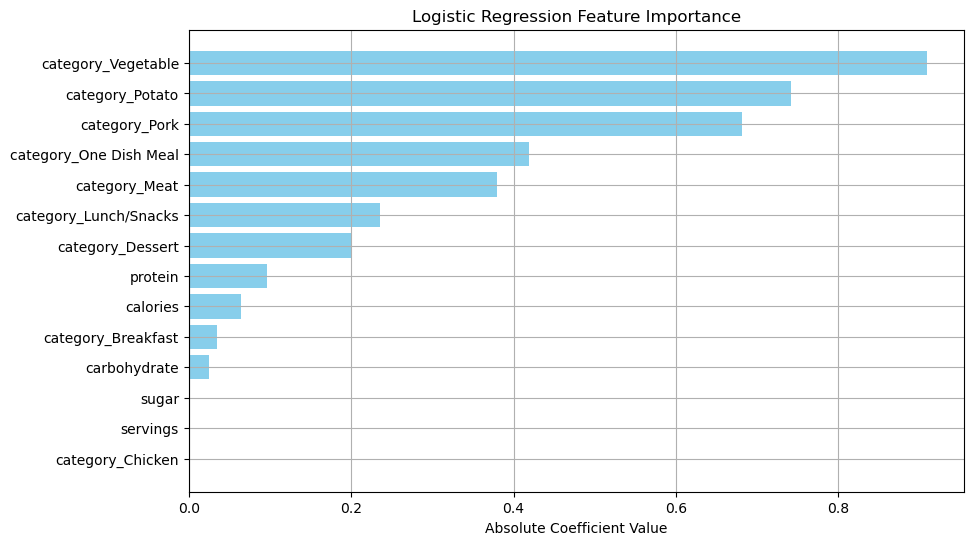

In [33]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

## Final recommendation
To improve recipe selection and drive higher user engagement, we recommend deploying the logistic regression model as a predictive tool for selecting homepage recipes. This model achieved over 80% recall on high-traffic recipes, meaning it successfully identifies the majority of recipes likely to drive website visits. 

Key predictors of high engagement include recipe category (especially Vegetable, Potato, Pork, One Dish Meal types of recipes). These recipe types should be prioritized on the website page. On the other hand, recipes in the "Chicken" category have little impact on high traffic. Just as well, nutritional metrics such as sugar and servings contributed little to generating high engagement.

Finally, In the future, after deploying the model I suggest continuous monitoring of monitoring user engagement levels to see if model may be improved. More features that may lead to more precise predictions should be looked into. For instance, the time of the day or season as user preferences may be influenced by these factors